In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd
import os
os.chdir('/content/drive/My Drive/Data Mining/Project')
!pwd

/content/drive/MyDrive/Data Mining/Project
/content/drive/.shortcut-targets-by-id/1sP5UkhoU_QwxuR23z2Wg07KsQoENBijK/Project


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [ ]:
df = pd.read_csv('cleaned_data.csv', parse_dates=['BasketDate'])
df = df[~df.BasketID.str.contains('C', na = False)]

In [ ]:
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
401600,581587,2011-09-12 12:50:00,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
401601,581587,2011-09-12 12:50:00,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
401602,581587,2011-09-12 12:50:00,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
401603,581587,2011-09-12 12:50:00,4.95,12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [ ]:
df.drop(columns=['BasketDate','Sale','Qta','ProdID','CustomerCountry'], inplace=True)

In [ ]:
df

,BasketID,CustomerID,ProdDescr
0,536365,17850.0,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,17850.0,WHITE METAL LANTERN
2,536365,17850.0,CREAM CUPID HEARTS COAT HANGER
3,536365,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,17850.0,RED WOOLLY HOTTIE WHITE HEART.
...,...,...,...
401600,581587,12680.0,CHILDREN'S APRON DOLLY GIRL
401601,581587,12680.0,CHILDRENS CUTLERY DOLLY GIRL
401602,581587,12680.0,CHILDRENS CUTLERY CIRCUS PARADE
401603,581587,12680.0,BAKING SET 9 PIECE RETROSPOT


In [ ]:
prova = df.groupby(['CustomerID'])['BasketID'].unique().apply(list)
# prova = [list(v) for v in prova]
prova

CustomerID
12346.0                                             [541431]
12347.0    [537626, 542237, 549222, 556201, 562032, 57351...
12348.0                     [539318, 541998, 548955, 568172]
12349.0                                             [577609]
12350.0                                             [543037]
                                 ...                        
18280.0                                             [545712]
18281.0                                             [556464]
18282.0                                     [562525, 580173]
18283.0    [540350, 541854, 545079, 550957, 554157, 55673...
18287.0                             [554065, 570715, 573167]
Name: BasketID, Length: 4339, dtype: object

In [ ]:
bask = []
for p in prova:
    if len(p) > 10:
        bask.append(list(p))

len(bask)

337

In [ ]:
baskets = []

for basket in bask:
    value = []
    for i in basket:
        value.append(df[df['BasketID']== i]['ProdDescr'].values.tolist())

    baskets.append(value)
        # baskets.append(df[df['BasketID']== i].groupby(['BasketID'])['ProdDescr'].apply(list).values.tolist())

print(len(baskets))

337


In [ ]:
baskets[0]

In [ ]:
len(baskets)

162

## Apply sequential pattern mining algorithm

In [ ]:
# threshold 10
history = [20096,4796,1622,663,308,157,95,15,7,6]
x = ['40','50','60','70','80','90','100','110','120','130']
y_pos = np.arange(len(x))

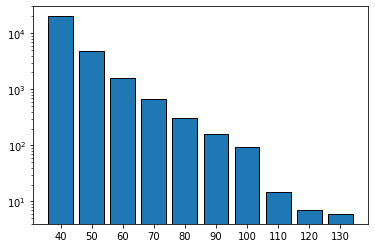

In [ ]:
plt.bar(y_pos, history, edgecolor='black')
# Create names on the x-axis
plt.xticks(y_pos, x)
plt.yscale('log')

In [ ]:
from gsp import *

res3 = apriori(baskets, 50, verbose=True)
print(len(res3))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Candidates generated, lvl 4: [[['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE GREEN']], [['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE RED ']], [['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE RED ']], [['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE GREEN']], [['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE RED ']], [['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE GREEN']], [['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE RED ']], [['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK

In [ ]:
for r in res3:
        print(r)

([['3 PIECE SPACEBOY COOKIE CUTTER SET']], 51)
([['6 RIBBONS RUSTIC CHARM']], 75)
([['60 CAKE CASES DOLLY GIRL DESIGN']], 55)
([['60 CAKE CASES VINTAGE CHRISTMAS']], 73)
([['60 TEATIME FAIRY CAKE CASES']], 93)
([['72 SWEETHEART FAIRY CAKE CASES']], 79)
([['ALARM CLOCK BAKELIKE GREEN']], 78)
([['ALARM CLOCK BAKELIKE IVORY']], 73)
([['ALARM CLOCK BAKELIKE ORANGE']], 56)
([['ALARM CLOCK BAKELIKE PINK']], 72)
([['ALARM CLOCK BAKELIKE RED ']], 94)
([['ANTIQUE SILVER T-LIGHT GLASS']], 67)
([['ASSORTED COLOUR BIRD ORNAMENT']], 110)
([['ASSORTED COLOURS SILK FAN']], 51)
([['BAKING SET 9 PIECE RETROSPOT ']], 78)
([['BATHROOM METAL SIGN']], 52)
([["BISCUIT TIN 50'S CHRISTMAS"]], 51)
([['BLUE DINER WALL CLOCK']], 54)
([['BLUE HARMONICA IN BOX ']], 63)
([['BLUE STRIPE CERAMIC DRAWER KNOB']], 50)
([['BOX OF 24 COCKTAIL PARASOLS']], 55)
([["BOX OF 6 MINI 50'S CRACKERS"]], 64)
([['BOX OF 6 MINI VINTAGE CRACKERS']], 58)
([['BUNDLE OF 3 ALPHABET EXERCISE BOOKS']], 55)
([['BUNDLE OF 3 RETRO NOTE BOOKS']

In [ ]:
for r in res3:
    if len(r[0]) > 2:
        print(r[0])

[['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE GREEN']]
[['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE RED ']]
[['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE RED ']]
[['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE GREEN']]
[['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE GREEN'], ['ALARM CLOCK BAKELIKE RED ']]
[['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE GREEN']]
[['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE RED '], ['ALARM CLOCK BAKELIKE RED ']]
[['ASSORTED COLOUR BIRD ORNAMENT'], ['ASSORTED COLOUR BIRD ORNAMENT'], ['ASSORTED COLOUR BIRD ORNAMENT']]
[['JUMBO  BAG BAROQUE BLACK WHITE'], ['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT']]
[['JUMBO BAG ALPHABET'], ['JUMBO BAG ALPHABET'], ['JUMBO BAG ALPHABET']]
[['JUMBO BAG ALPHABET'], ['JUMBO BAG ALPHABET'], ['JUMBO B